In [2]:
# STEP 1: Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# STEP 2: Load the Dataset
df = pd.read_csv('/content/Crop_recommendation.csv')

# STEP 3: Encode labels
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

X = df.drop('label', axis=1)
y = df['label']

# STEP 4: Split and Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ANN = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    Dense(64, activation='relu'),
    Dense(len(le.classes_), activation='softmax')
])

ANN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
ANN.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.0683 - loss: 16.7940 - val_accuracy: 0.4727 - val_loss: 1.6979
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5439 - loss: 1.3564 - val_accuracy: 0.7455 - val_loss: 0.7895
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8062 - loss: 0.6169 - val_accuracy: 0.7909 - val_loss: 0.5813
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8648 - loss: 0.4434 - val_accuracy: 0.8568 - val_loss: 0.4331
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8849 - loss: 0.3462 - val_accuracy: 0.8932 - val_loss: 0.3094
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9216 - loss: 0.2608 - val_accuracy: 0.8864 - val_loss: 0.2893
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9149 - loss: 0.2408 - val_accuracy: 0.9023 - val_loss: 0.2578
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9296 - loss: 0.2181 - val_accuracy: 0.9159 - val_los

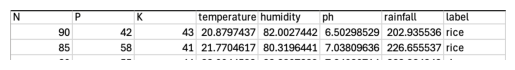

In [6]:
import matplotlib.pyplot as plt
import cv2
plt.imshow(cv2.cvtColor(cv2.imread("/content/example rice.png"), cv2.COLOR_BGR2RGB)); plt.axis('off'); plt.show()


In [7]:
# STEP 5: Get User Input
N = int(input("Ratio of Nitrogen in Soil: "))
P = int(input("Ratio of Phosphorous in Soil: "))
K = int(input("Ratio of Potassium in Soil: "))
temperature = float(input("Average Temperature in Celsius: "))
humidity = int(input("Average Relative Humidity in %: "))
ph = float(input("pH value of soil: "))
rainfall = int(input("Average Rainfall in mm: "))

# STEP 6: Prepare input for prediction
User_Val = pd.DataFrame({
    'N': [N],
    'P': [P],
    'K': [K],
    'temperature': [temperature],
    'humidity': [humidity],
    'ph': [ph],
    'rainfall': [rainfall]
})

# STEP 7: Predict and Output
y_predict = ANN.predict(User_Val)
predicted_index = np.argmax(y_predict[0])
predicted_crop = le.inverse_transform([predicted_index])[0]

print(f"\n Recommended Crop: {predicted_crop}")


Ratio of Nitrogen in Soil: 90
Ratio of Phosphorous in Soil: 42
Ratio of Potassium in Soil: 43
Average Temperature in Celsius: 21
Average Relative Humidity in %: 82
pH value of soil: 6.5
Average Rainfall in mm: 202
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step

 Recommended Crop: rice
